In [76]:
# in the file step3_citation_2, not very successful

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kstest, poisson
import statsmodels.api as sm

path = os.path.abspath(os.path.dirname(os.getcwd())) + '\\data'

In [5]:
info_article = pd.read_csv(path+'\\info\\info_article_o_8_n.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_9.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_9_m.csv')

In [6]:
info_article.head()

,number_volume,number_issue,number_article,year,period,type_decide,type_1,type_2,name_book,name_book_words,...,judge_mutiple_country_article,page_start,page_end,page_quant,date_receive,date_accept,date_online,views,Crossref,Web_of_Science
0,1,1,1,1999,1999-1,introduction,introduction,Introduction,introduction,['introduction'],...,0,1,7,7,NaN,NaN,21 Oct 2013,26,1,0
1,1,1,2,1999,1999-1,article,Article,Original Articles,national models for making and legitimating el...,"['national', 'model', 'making', 'legitimating'...",...,0,9,31,23,NaN,NaN,21 Oct 2013,78,14,0
2,1,1,3,1999,1999-1,article,Article,Original Articles,"models of the family, women’s role and social ...","['model', 'family', 'woman', 'role', 'social',...",...,0,33,58,26,NaN,NaN,21 Oct 2013,441,15,0
3,1,1,4,1999,1999-1,article,Article,Original Articles,the european union and equal opportunities pol...,"['european', 'union', 'equal', 'opportunity', ...",...,0,59,80,22,NaN,NaN,21 Oct 2013,142,13,0
4,1,1,5,1999,1999-1,article,Article,Original Articles,private and public transfers between generatio...,"['private', 'public', 'transfer', 'generation'...",...,0,81,104,24,NaN,NaN,21 Oct 2013,371,194,0


In [83]:
mean = info_article['Crossref'].mean()
std = info_article['Crossref'].std()
XY = info_article[info_article['Crossref'] <= mean+3*std]

Y = XY['Crossref']

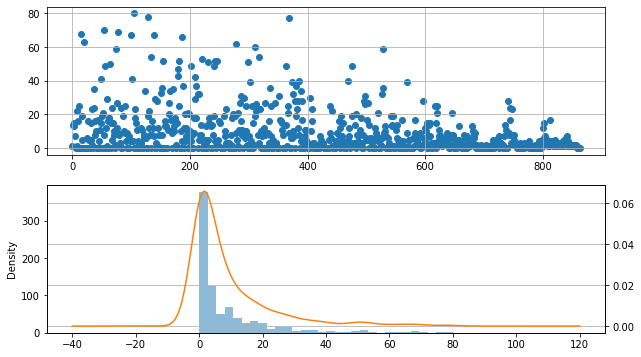

In [84]:
fig = plt.figure(figsize = (10,6))

ax1 = fig.add_subplot(2,1,1)
ax1.scatter(Y.index, Y.values)
plt.grid()

ax2 = fig.add_subplot(2,1,2)
Y.hist(bins=30,alpha = 0.5,ax = ax2)
Y.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

In [85]:
# not a very good idea to us K-S test
# relatively large sample
kstest(Y, poisson(mu=Y.mean()).cdf)

KstestResult(statistic=0.48601784804993464, pvalue=3.014768826531708e-185)

In [86]:
X1 = pd.get_dummies(XY['type_decide'], prefix='type_decide')
X2 = XY['page_quant']
X3 = XY['author_mutiple_country']
X4 = XY['number_volume']
X5 = pd.get_dummies(XY['number_issue'], prefix='number_issue')
X6 = XY['number_article']
X7 = XY['author_number']

In [87]:
X = pd.concat(objs=[X1,X2,X3,X4,X5,X6,X7], axis='columns')
X_model = sm.add_constant(X)

model = sm.OLS(Y,X_model)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Crossref   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     18.37
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           1.55e-42
Time:                        14:34:10   Log-Likelihood:                -3271.3
No. Observations:                 849   AIC:                             6575.
Df Residuals:                     833   BIC:                             6651.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           8.2292      1.430      5.754      0.000       5.422      11.037
type_decide_article             3.7884      1.622      2.336      0.020       0.605       6.972
type_decide_book review        -2.4813      1.531     -1.620      0.106      -5.487       0.525
type_decide_correction          1.8071      4.143      0.436      0.663      -6.326       9.940
type_decide_editorial          -1.1040      1.671     -0.661      0.509      -4.384       2.176
type_decide_editorial board     3.3431      3.949      0.847      0.397      -4.408      11.094
type_decide_introduction        2.8758      2.859      1.006      0.315      -2.737       8.488
page_quant                      0.3031      0.072      4.219      0.000       0.162       0.444
author_mutiple_country         -2.8952      1.860     -1.557      0.120      -6.545       0.755
number_volume                  -0.6309      0.073     -8.597      0.000      -0.775      -0.487
number_issue_1                  2.1882      0.883      2.478      0.013       0.455       3.921
number_issue_2                  0.3072      0.881      0.349      0.727      -1.422       2.037
number_issue_3                  1.9120      0.913      2.095      0.036       0.121       3.703
number_issue_4                  1.4074      0.923      1.525      0.128      -0.404       3.219
number_issue_5                 -1.2956      1.037     -1.250      0.212      -3.330       0.739
number_issue_S1                 3.7100      2.337      1.588      0.113      -0.877       8.297
number_article                 -0.1133      0.078     -1.454      0.146      -0.266       0.040
author_number                   0.3357      0.299      1.124      0.261      -0.251       0.922
==============================================================================
Omnibus:                      427.613   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2579.705
Skew:                           2.270   Prob(JB):                         0.00
Kurtosis:                      10.233   Cond. No.                     1.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.61e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
X = pd.concat(objs=[X1,X2,X3,X4,X5,X6,X7], axis='columns')
X = X[['type_decide_article','type_decide_book review',
       'page_quant', 'author_mutiple_country',
       'number_volume', 'number_issue_1',
       'number_issue_3', 'number_issue_4',
       'number_issue_S1', 'number_article']]
X_model = sm.add_constant(X)

model = sm.OLS(Y,X_model)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Crossref   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     27.12
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           4.55e-45
Time:                        14:45:14   Log-Likelihood:                -3273.6
No. Observations:                 849   AIC:                             6569.
Df Residuals:                     838   BIC:                             6621.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       8.0426      1.679      4.790      0.000       4.747      11.338
type_decide_article         3.5929      1.827      1.966      0.050       0.006       7.179
type_decide_book review    -2.5343      1.781     -1.423      0.155      -6.030       0.962
page_quant                  0.3304      0.069      4.810      0.000       0.196       0.465
author_mutiple_country     -2.5813      1.848     -1.397      0.163      -6.209       1.047
number_volume              -0.6305      0.072     -8.775      0.000      -0.772      -0.489
number_issue_1              2.4668      1.103      2.236      0.026       0.301       4.633
number_issue_3              2.1268      1.132      1.878      0.061      -0.096       4.350
number_issue_4              1.5695      1.142      1.375      0.170      -0.672       3.810
number_issue_S1             4.1298      2.653      1.557      0.120      -1.077       9.336
number_article             -0.0952      0.076     -1.246      0.213      -0.245       0.055
==============================================================================
Omnibus:                      436.722   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2741.718
Skew:                           2.313   Prob(JB):                         0.00
Kurtosis:                      10.490   Cond. No.                         174.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
X = pd.concat(objs=[X1,X2,X3,X4,X5,X6,X7], axis='columns')
X_model = sm.add_constant(X)

model = sm.GLM(Y,X_model,family=sm.families.Poisson())
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Crossref   No. Observations:                  849
Model:                            GLM   Df Residuals:                      833
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4793.0
Date:                Mon, 02 Aug 2021   Deviance:                       7266.7
Time:                        14:35:20   Pearson chi2:                 9.03e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.9340   3253.411     -0.002      0.999   -6381.503    6371.635
type_decide_article             8.1900   3795.646      0.002      0.998   -7431.140    7447.520
type_decide_book review         3.6458   3795.646      0.001      0.999   -7435.684    7442.976
type_decide_correction        -15.5355   1.64e+04     -0.001      0.999   -3.23e+04    3.22e+04
type_decide_editorial           6.0173   3795.646      0.002      0.999   -7433.313    7445.347
type_decide_editorial board   -15.3125   1.54e+04     -0.001      0.999   -3.03e+04    3.02e+04
type_decide_introduction        8.0608   3795.646      0.002      0.998   -7431.269    7447.391
page_quant                      0.0331      0.002     16.053      0.000       0.029       0.037
author_mutiple_country         -0.2845      0.062     -4.599      0.000      -0.406      -0.163
number_volume                  -0.0625      0.002    -30.186      0.000      -0.067      -0.058
number_issue_1                 -0.7325    542.235     -0.001      0.999   -1063.494    1062.029
number_issue_2                 -0.8927    542.235     -0.002      0.999   -1063.654    1061.869
number_issue_3                 -0.7403    542.235     -0.001      0.999   -1063.502    1062.021
number_issue_4                 -0.7732    542.235     -0.001      0.999   -1063.535    1061.988
number_issue_5                 -1.1217    542.235     -0.002      0.998   -1063.883    1061.640
number_issue_S1                -0.6736    542.235     -0.001      0.999   -1063.435    1062.088
number_article                 -0.0253      0.004     -7.092      0.000      -0.032      -0.018
author_number                   0.0606      0.008      8.078      0.000       0.046       0.075
===============================================================================================
"""

In [92]:
X = pd.concat(objs=[X1,X2,X3,X4,X5,X6,X7], axis='columns')
X_model = X[['page_quant', 'author_mutiple_country',
             'number_volume', 'number_article', 'author_number']]

model = sm.GLM(Y,X_model,family=sm.families.Poisson())
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Crossref   No. Observations:                  849
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5915.7
Date:                Mon, 02 Aug 2021   Deviance:                       9512.1
Time:                        14:40:36   Pearson chi2:                 1.44e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
page_quant                 0.1084      0.001    129.356      0.000       0.107       0.110
author_mutiple_country    -0.7012      0.059    -11.906      0.000      -0.817      -0.586
number_volume             -0.0268      0.002    -15.963      0.000      -0.030      -0.023
number_article            -0.0041      0.002     -1.837      0.066      -0.009       0.000
author_number              0.0386      0.007      5.914      0.000       0.026       0.051
==========================================================================================
"""